In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage, HumanMessage
from typing import TypedDict, Annotated
from dotenv import load_dotenv

In [2]:
class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
load_dotenv()

True

In [4]:
llm = ChatOpenAI()

def chat_node(state: ChatState):

    messages = state['messages']
    response = llm.invoke(messages)
    return {'messages':[response]}

In [5]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

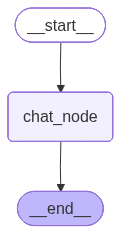

In [6]:
chatbot = graph.compile(checkpointer=checkpointer)
chatbot

In [7]:
initial_state = {'messages':[HumanMessage(content='who are you?')]}
final_state = chatbot.invoke(initial_state)
final_state

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [8]:
thread_id = '1'

while True:
    user_message = input('Type here: ')
    print('User: ', user_message)
    if user_message.strip().lower() in ['exit', 'bye', 'quit']:
        break

    config = {'configurable': {'thread_id': thread_id}}

    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    
    print('AI: ', response['messages'][-1].content)


User:  Hey. I am Shwetank
AI:  Hello Shwetank! How can I assist you today?
User:  who am I?
AI:  You are Shwetank, as you mentioned earlier. You are a unique individual with your own thoughts, feelings, and experiences. How can I help you today, Shwetank?
User:  


KeyboardInterrupt: 

In [ ]:
chatbot.get_state(config=config)